## *About Dataset*
Ini adalah kumpulan data simulasi yang mengeksplorasi bagaimana kebiasaan gaya hidup memengaruhi prestasi akademik siswa. Dengan 1.000 catatan siswa dan 15+ fitur termasuk jam belajar, pola tidur, penggunaan media sosial, kualitas diet, kesehatan mental, dan nilai ujian akhir, kumpulan data ini sangat cocok untuk proyek ML, analisis regresi, pengelompokan, dan visualisasi data. Dibuat menggunakan pola realistis untuk praktik pendidikan.

In [170]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from kaggle.api.kaggle_api_extended import KaggleApi

warnings.filterwarnings('ignore')
sns.set_style('dark')

In [171]:
# Authenticate with Kaggle
api = KaggleApi()
api.authenticate()

# download dataset
data_name = "jayaantanaath/student-habits-vs-academic-performance"
api.dataset_download_files(data_name, path='./dataset', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance


# Read Data

In [172]:
student_habits = pd.read_csv('./dataset/student_habits_performance.csv')
print(student_habits.shape)
student_habits.head()

(1000, 16)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


# Data Preprocessing

In [173]:
student_habits.isna().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [174]:
student_habits = student_habits.dropna()

In [175]:
student_habits.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [176]:
student_habits.duplicated().sum()

0

In [177]:
student_habits.nunique()

student_id                       909
age                                8
gender                             3
study_hours_per_day               76
social_media_hours                59
netflix_hours                     49
part_time_job                      2
attendance_percentage            316
sleep_hours                       67
diet_quality                       3
exercise_frequency                 7
parental_education_level           3
internet_quality                   3
mental_health_rating              10
extracurricular_participation      2
exam_score                       453
dtype: int64

In [178]:
student_habits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     909 non-null    object 
 1   age                            909 non-null    int64  
 2   gender                         909 non-null    object 
 3   study_hours_per_day            909 non-null    float64
 4   social_media_hours             909 non-null    float64
 5   netflix_hours                  909 non-null    float64
 6   part_time_job                  909 non-null    object 
 7   attendance_percentage          909 non-null    float64
 8   sleep_hours                    909 non-null    float64
 9   diet_quality                   909 non-null    object 
 10  exercise_frequency             909 non-null    int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               909 non-null    object 


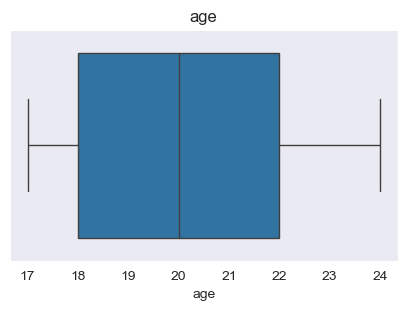

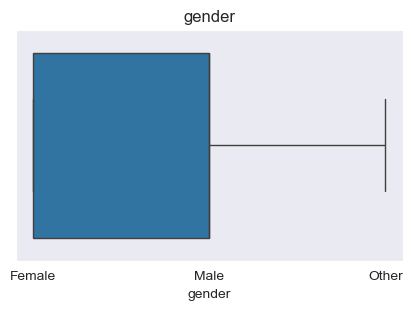

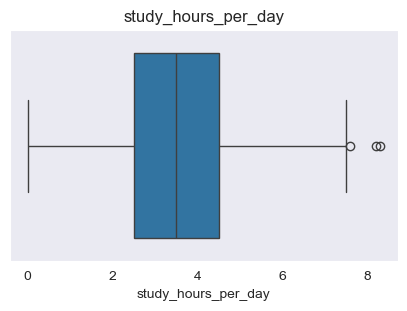

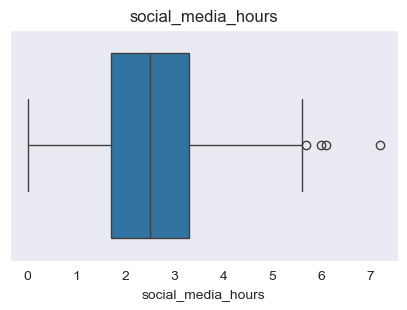

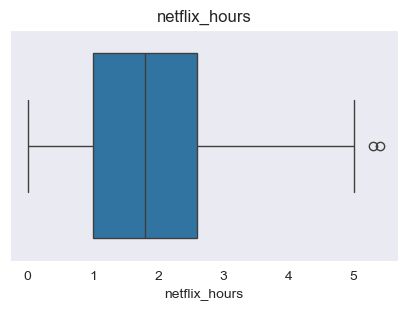

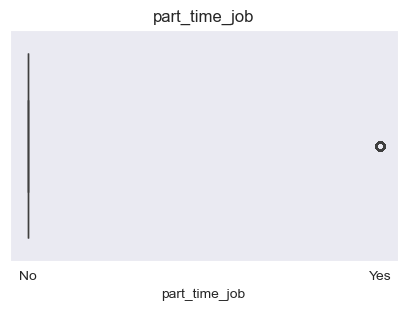

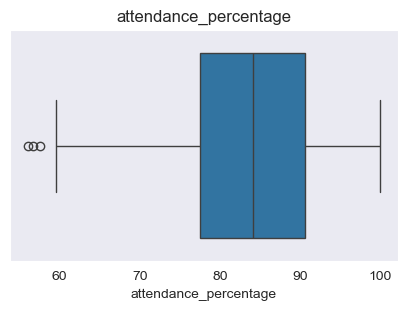

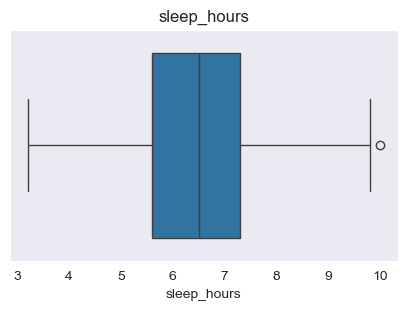

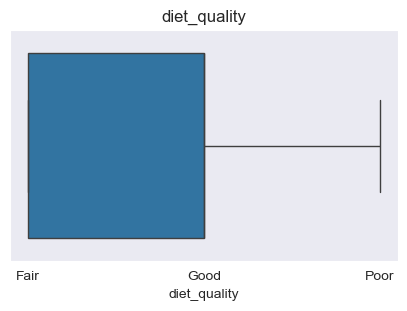

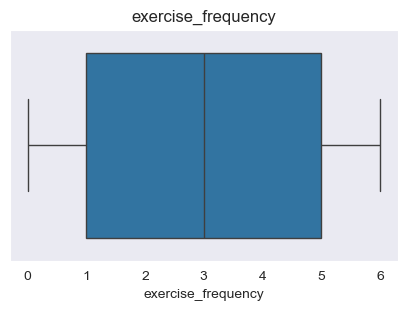

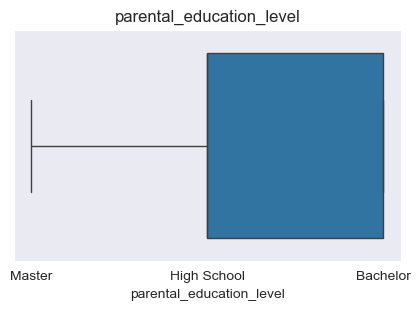

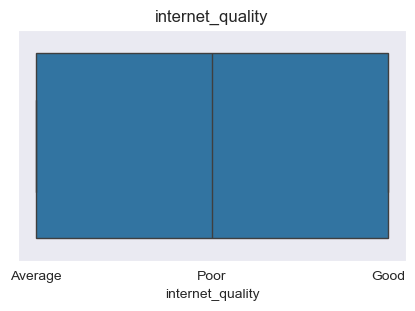

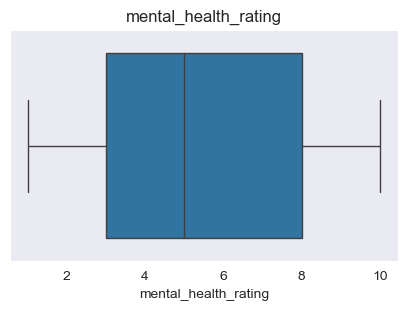

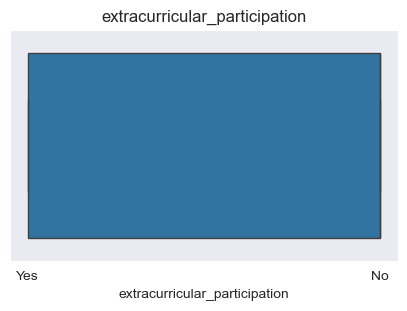

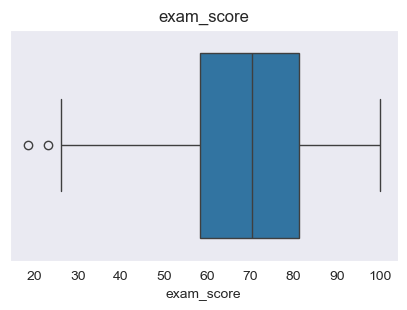

In [179]:
column = student_habits.columns[~(student_habits.columns == 'student_id')]

for i in column:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=student_habits, x=i)
    plt.title(f"{i}")
    plt.show()

boxplot diatas menunjukkan adanya outlier pada table 'gender' jadi, saya akan menghilangkannya terlebih dahulu

In [180]:
student_habits['gender'].value_counts()

gender
Male      440
Female    433
Other      36
Name: count, dtype: int64

In [181]:
student_habits = student_habits[student_habits['gender'] != 'Other']

In [182]:
student_habits['gender'].value_counts()

gender
Male      440
Female    433
Name: count, dtype: int64

In [183]:
select_columns = student_habits.drop(columns=['student_id'])
select_columns = student_habits.select_dtypes(exclude='object')
select_columns

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
0,23,0.0,1.2,1.1,85.0,8.0,6,8,56.2
1,20,6.9,2.8,2.3,97.3,4.6,6,8,100.0
2,21,1.4,3.1,1.3,94.8,8.0,1,1,34.3
3,23,1.0,3.9,1.0,71.0,9.2,4,1,26.8
4,19,5.0,4.4,0.5,90.9,4.9,3,1,66.4
...,...,...,...,...,...,...,...,...,...
995,21,2.6,0.5,1.6,77.0,7.5,2,6,76.1
996,17,2.9,1.0,2.4,86.0,6.8,1,6,65.9
997,20,3.0,2.6,1.3,61.9,6.5,5,9,64.4
998,24,5.4,4.1,1.1,100.0,7.6,0,1,69.7


<Axes: >

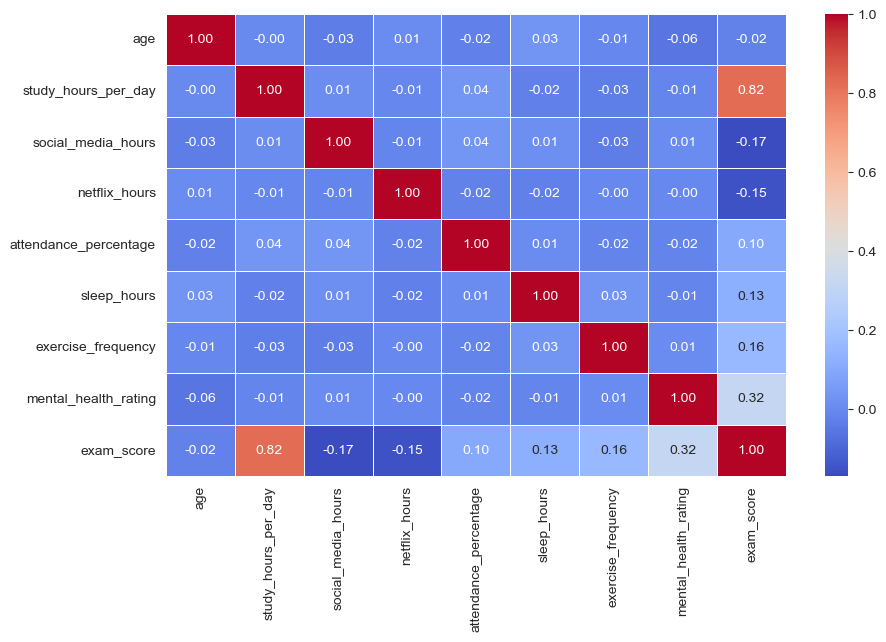

In [184]:
data_corr = select_columns.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data_corr, annot=True, linewidths=0.5, fmt='.2f', cmap='coolwarm' )

korelasi diatas menunjukkan bahwa yang paling mempengaruhi nilai seorang siswa itu adalah seberapa lama siswa tersebut menghabiskan waktu untuk belajar. Namun kita tidak bisa mengabaikan faktor yang lain, contohnya seperti kesehatan mental, mungkin saja mental seorang siswa dapat mempengaruhi nilai ujiannya atau mungkin faktor lainnya.

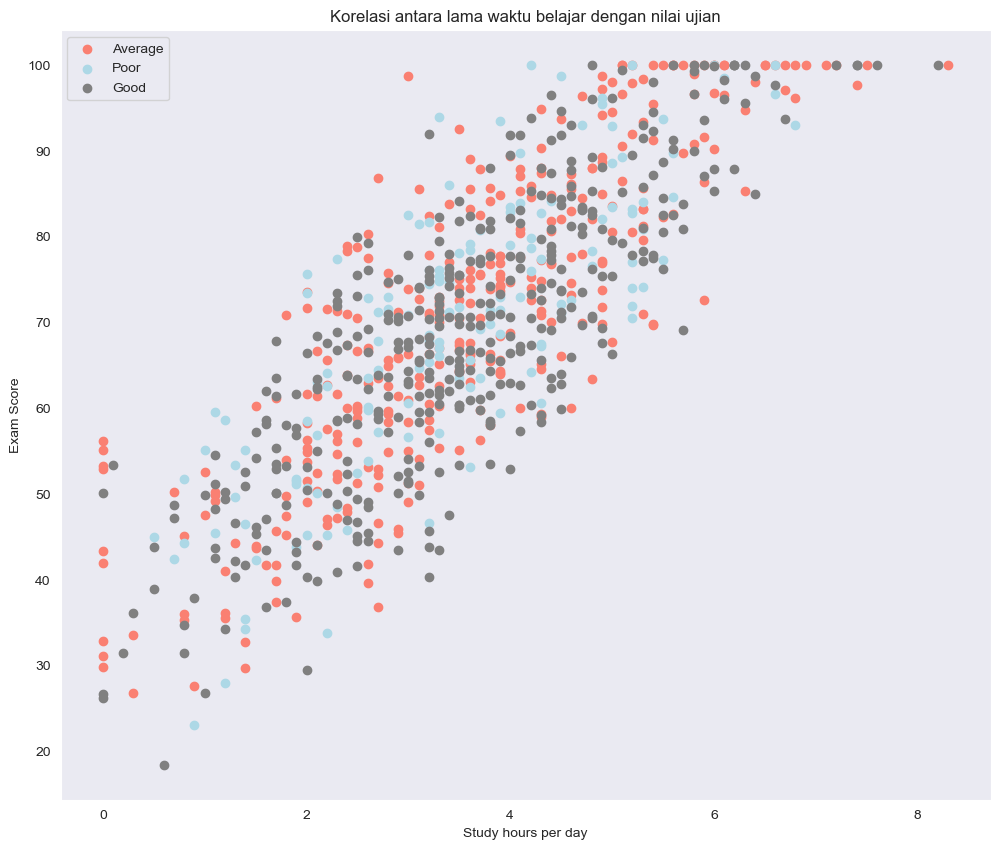

In [185]:
plt.figure(figsize=(12, 10))
plt.scatter(student_habits.study_hours_per_day[student_habits.internet_quality=='Average'],
            student_habits.exam_score[student_habits.internet_quality=='Average'],
            c='salmon')
plt.scatter(student_habits.study_hours_per_day[student_habits.internet_quality=='Poor'],
            student_habits.exam_score[student_habits.internet_quality=='Poor'],
            c='lightblue')
plt.scatter(student_habits.study_hours_per_day[student_habits.internet_quality=='Good'],
            student_habits.exam_score[student_habits.internet_quality=='Good'],
            c='gray')
plt.title('Korelasi antara lama waktu belajar dengan nilai ujian')
plt.xlabel('Study hours per day')
plt.ylabel('Exam Score')
plt.legend(['Average', 'Poor', 'Good'])

In [186]:
exam_under60 = student_habits[student_habits['exam_score'] < 60]
exam_60_75 = student_habits[(student_habits['exam_score'] >= 60) & (student_habits['exam_score'] <= 75)]
exam_76_85 = student_habits[(student_habits['exam_score'] > 75) & (student_habits['exam_score'] <= 85)]
exam_86_100 = student_habits[(student_habits['exam_score'] > 85) & (student_habits['exam_score'] <= 100)]

data = [exam_under60, exam_60_75, exam_76_85, exam_86_100]

def plot_study_exam_correlation(dataframe, figsize=(8, 6)):
    """
    Membuat scatter plot yang menunjukkan korelasi antara lama waktu belajar dengan nilai ujian,
    dikelompokkan berdasarkan kualitas internet.
    
    Parameters:
    -----------
    dataframe : pandas.DataFrame
        DataFrame yang berisi data mahasiswa dengan kolom 'study_hours_per_day', 
        'exam_score', dan 'internet_quality'
    figsize : tuple, default (8, 6)
        Ukuran figure plot dalam inci (lebar, tinggi)
    
    Returns:
    --------
    None (menampilkan plot dan statistik)
    """
    
    # Memastikan parameter dataframe adalah DataFrame valid
    if not isinstance(dataframe, pd.DataFrame):
        raise TypeError("Parameter dataframe harus berupa pandas DataFrame")
    
    # Memastikan kolom yang diperlukan ada di DataFrame
    required_columns = ['study_hours_per_day', 'exam_score', 'internet_quality', 'mental_health_rating']
    for col in required_columns:
        if col not in dataframe.columns:
            raise ValueError(f"DataFrame tidak memiliki kolom '{col}'")
    
    # Membuat plot
    plt.figure(figsize=figsize)
    
    # Plot untuk tiap kategori kualitas internet
    categories = ['Average', 'Poor', 'Good']
    colors = ['salmon', 'lightblue', 'gray']
    
    for category, color in zip(categories, colors):
        mask = dataframe.internet_quality == category
        plt.scatter(
            dataframe.study_hours_per_day[mask],
            dataframe.exam_score[mask],
            c=color
        )
    
    # Menambahkan label dan judul
    plt.title('Korelasi antara lama waktu belajar dengan nilai ujian')
    plt.xlabel('Study hours per day')
    plt.ylabel('Exam Score')
    plt.legend(categories)
    
    # Menampilkan statistik
    print("Distribusi Kualitas Internet:")
    print(dataframe.internet_quality.value_counts())
    print("\nDistribusi Rating Kesehatan Mental:")
    print(dataframe.mental_health_rating.value_counts())
    
    # Menampilkan plot
    plt.show()

Distribusi Kualitas Internet:
internet_quality
Good       115
Average     94
Poor        39
Name: count, dtype: int64

Distribusi Rating Kesehatan Mental:
mental_health_rating
1     36
4     36
2     33
3     33
5     32
6     22
8     19
10    15
7     13
9      9
Name: count, dtype: int64


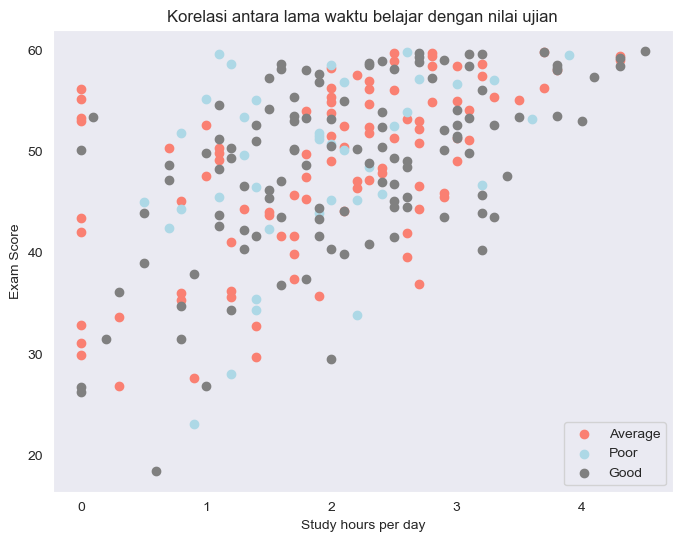

Distribusi Kualitas Internet:
internet_quality
Good       139
Average    110
Poor        49
Name: count, dtype: int64

Distribusi Rating Kesehatan Mental:
mental_health_rating
6     35
2     34
1     33
7     32
4     32
3     31
8     30
5     25
9     25
10    21
Name: count, dtype: int64


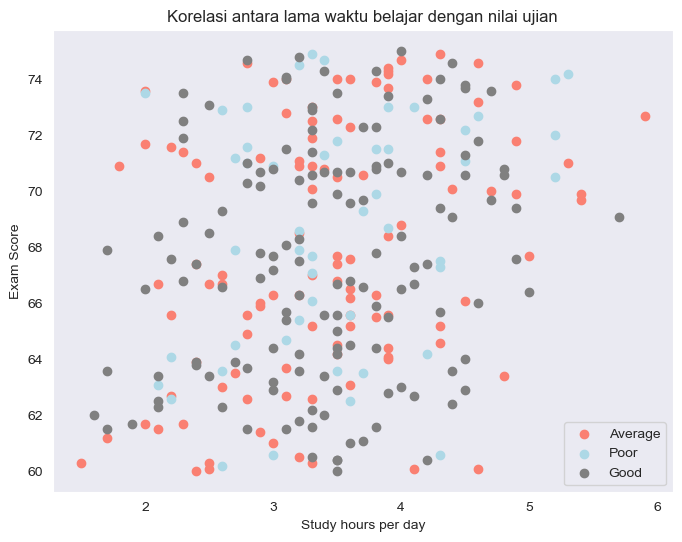

Distribusi Kualitas Internet:
internet_quality
Good       74
Average    56
Poor       34
Name: count, dtype: int64

Distribusi Rating Kesehatan Mental:
mental_health_rating
9     23
10    23
6     22
4     18
5     16
8     14
7     13
1     12
2     12
3     11
Name: count, dtype: int64


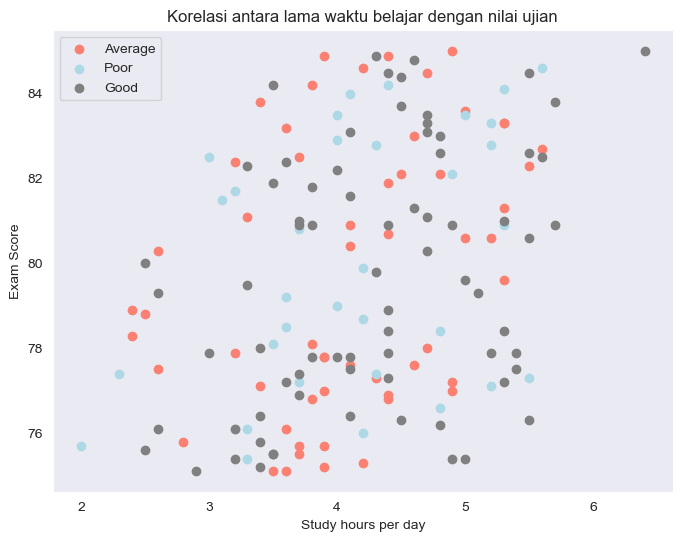

Distribusi Kualitas Internet:
internet_quality
Average    80
Good       63
Poor       20
Name: count, dtype: int64

Distribusi Rating Kesehatan Mental:
mental_health_rating
10    30
8     29
7     23
9     20
6     14
5     13
4     11
1      9
3      9
2      5
Name: count, dtype: int64


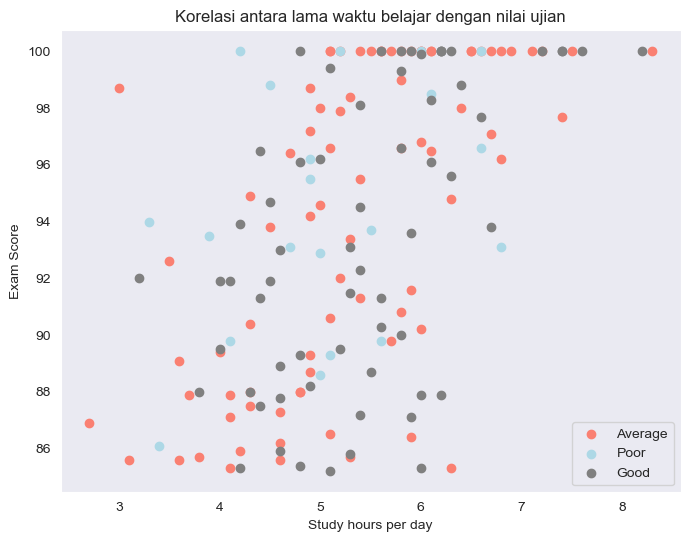

[None, None, None, None]

In [187]:
[plot_study_exam_correlation(i) for i in data] # list comprehension for looping

dari plot diatas kita bisa melihat bahwa kualitas internet tidak memiliki pengaruh yang kuat karena setelah dilihat pada masing-masing bagian pada 4 scatter plot diatas kualitas internet pada masing-masing siswa cenderung merata, akan tetapi yang sangat mempengaruhi nilai ujian seorang siswa adalah durasi belajar siswa tersebut perharinya. Semakin lama siswa menghabiskan waktu untuk belajar maka akan semakin besar peluang mendapatkan nilai maksimal dan bagus

In [188]:
# Membuat interval untuk nilai exam_score
bins = [18, 27, 37, 47, 57, 67, 77, 87, 97, 107]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67', '68-77', '78-87', '88-97', '98-107']

# Membuat kolom baru yang berisi kategori nilai
student_habits['score_category'] = pd.cut(student_habits['exam_score'], bins=bins, labels=labels)

# Membuat tabel frekuensi berdasarkan kategori
category_frequency = student_habits['score_category'].value_counts().sort_index()

# Menampilkan tabel frekuensi kategori
print("Frequency of Exam Score Categories:")
print(category_frequency)

# Menampilkan dalam bentuk persentase
percentage_table = student_habits['score_category'].value_counts(normalize=True).sort_index() * 100
print("\nPercentage of Exam Score Categories:")
print(percentage_table.round(2), "%")

Frequency of Exam Score Categories:
score_category
18-27       6
28-37      24
38-47      64
48-57     108
58-67     180
68-77     201
78-87     146
88-97      84
98-107     60
Name: count, dtype: int64

Percentage of Exam Score Categories:
score_category
18-27      0.69
28-37      2.75
38-47      7.33
48-57     12.37
58-67     20.62
68-77     23.02
78-87     16.72
88-97      9.62
98-107     6.87
Name: proportion, dtype: float64 %


Text(0.5, 1.0, 'frekuensi nilai siswa')

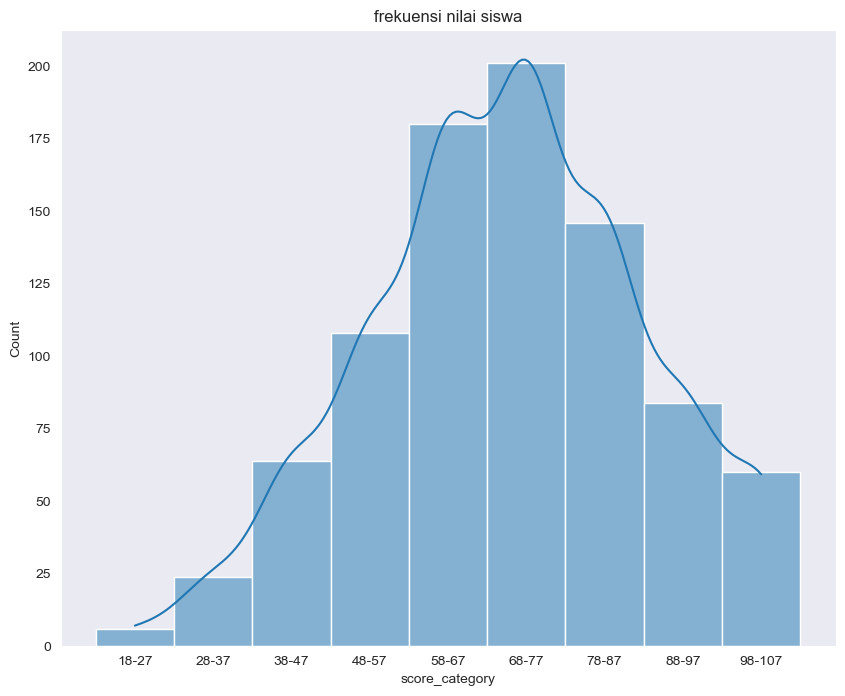

In [189]:
plt.figure(figsize=(10,8))
sns.histplot(student_habits['score_category'],kde=True, bins=8)
plt.title('frekuensi nilai siswa') 

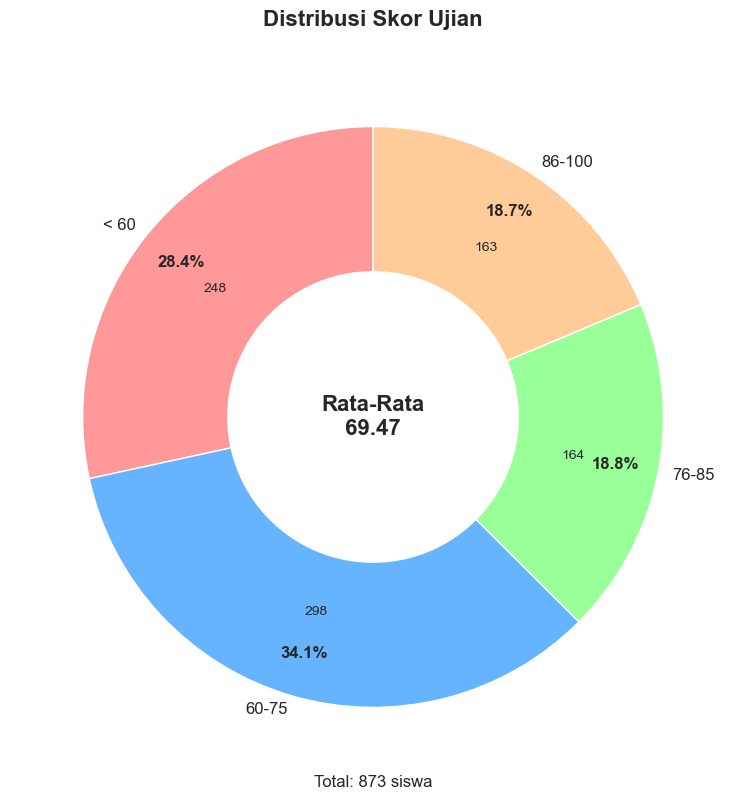

In [190]:
score_under60 = (student_habits['exam_score'] < 60).sum()
score_60_75 = ((student_habits['exam_score'] >= 60) & (student_habits['exam_score'] <= 75)).sum()
score_76_85 = ((student_habits['exam_score'] > 75) & (student_habits['exam_score'] <= 85)).sum()
score_86_100 = ((student_habits['exam_score'] > 85) & (student_habits['exam_score'] <= 100)).sum()

total = len(student_habits['exam_score'])

persentase1 = (score_under60 / total) * 100
persentase2 = (score_60_75 / total) * 100
persentase3 = (score_76_85 / total) * 100
persentase4 = (score_86_100 / total) * 100

# Persiapan data untuk donut chart
labels = ['< 60', '60-75', '76-85', '86-100']
sizes = [persentase1, persentase2, persentase3, persentase4]
counts = [score_under60, score_60_75, score_76_85, score_86_100]

# Pastikan semua persentase berjumlah 100% (menghindari masalah pembulatan)
if abs(sum(sizes) - 100) > 0.1:  # Toleransi kesalahan pembulatan 0.1%
    print(f"Peringatan: Total persentase adalah {sum(sizes):.1f}%, bukan 100%")

# Warna yang profesional
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Buat donut chart
fig, ax = plt.subplots(figsize=(8, 8))

# Plot donut chart
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.5, edgecolor='white'),
    textprops={'fontsize': 12},
    pctdistance=0.85,
    labeldistance=1.05
)

# Tambahkan angka count ke label
for i, (wedge, autotext, count) in enumerate(zip(wedges, autotexts, counts)):
    ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    y = 0.7 * np.sin(np.deg2rad(ang))
    x = 0.7 * np.cos(np.deg2rad(ang))
    ax.text(x, y, f"{count}", ha='center', va='center', fontsize=10)
    
    # Format persentase dalam teks
    autotext.set_fontweight('bold')

# Tambahkan judul
plt.title('Distribusi Skor Ujian', fontsize=16, pad=20, fontweight='bold')
ax.set_aspect('equal')

# Tambahkan teks di tengah
plt.annotate(f'Rata-Rata\n{student_habits['exam_score'].mean():.2f}', 
             xy=(0, 0),
             ha='center',
             va='center',
             fontsize=16,
             fontweight='bold')

# Tambahkan keterangan di bawah (opsional)
plt.figtext(0.5, 0.01, f'Total: {total} siswa', ha='center', fontsize=12)

# Hilangkan border/outline dari figure
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


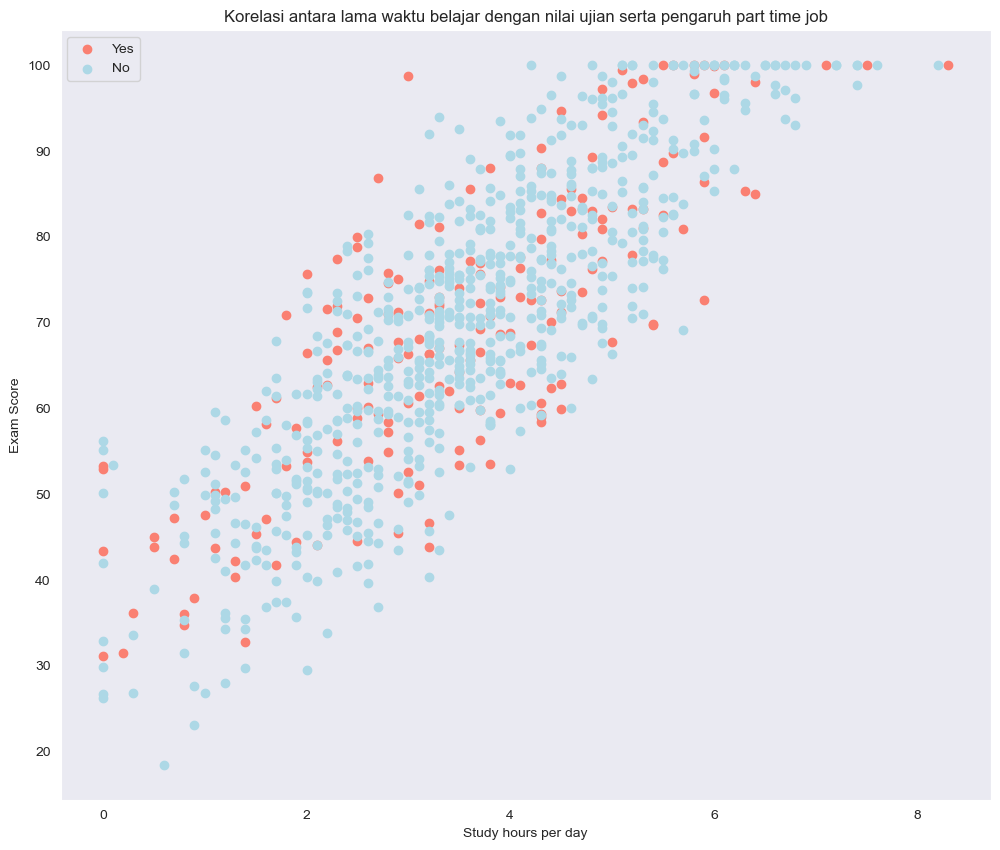

In [191]:
plt.figure(figsize=(12, 10))

plt.scatter(student_habits.study_hours_per_day[student_habits.part_time_job=='Yes'],
            student_habits.exam_score[student_habits.part_time_job=='Yes'],
            c='salmon')
plt.scatter(student_habits.study_hours_per_day[student_habits.part_time_job=='No'],
            student_habits.exam_score[student_habits.part_time_job=='No'],
            c='lightblue')
plt.title('Korelasi antara lama waktu belajar dengan nilai ujian serta pengaruh part time job')
plt.xlabel('Study hours per day')
plt.ylabel('Exam Score')
plt.legend(['Yes', 'No'])

In [192]:
compare = pd.crosstab(student_habits.score_category, student_habits.part_time_job)
compare

part_time_job,No,Yes
score_category,,
18-27,6,0
28-37,18,6
38-47,48,16
48-57,87,21
58-67,139,41
68-77,156,45
78-87,114,32
88-97,73,11
98-107,44,16


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '18-27'),
  Text(1, 0, '28-37'),
  Text(2, 0, '38-47'),
  Text(3, 0, '48-57'),
  Text(4, 0, '58-67'),
  Text(5, 0, '68-77'),
  Text(6, 0, '78-87'),
  Text(7, 0, '88-97'),
  Text(8, 0, '98-107')])

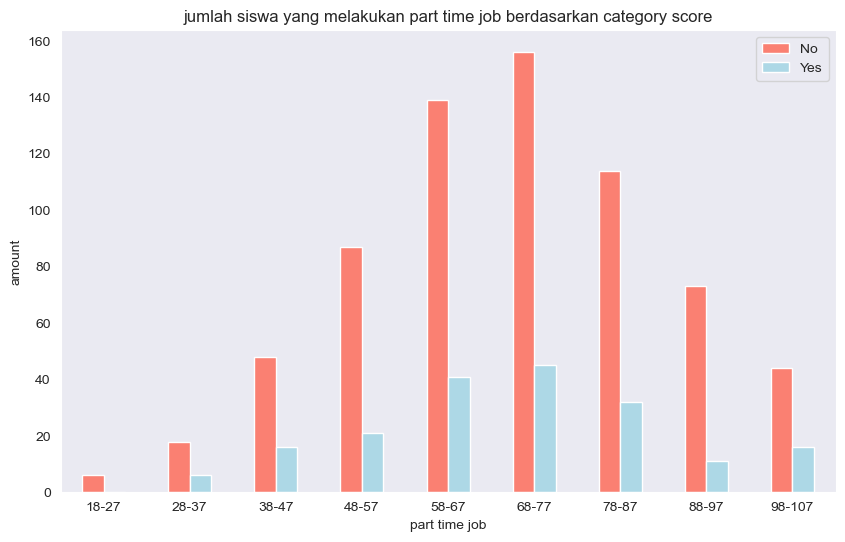

In [193]:
compare.plot(kind='bar',figsize=(10, 6),
             color=['salmon', 'lightblue'])
plt.title('jumlah siswa yang melakukan part time job berdasarkan category score')
plt.xlabel('part time job')
plt.ylabel('amount')
plt.legend(['No', 'Yes'])
plt.xticks(rotation=0)

In [194]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer

In [195]:
data_student = student_habits.drop(columns=['student_id', 'score_category']).values

In [196]:
le = LabelEncoder()

data_le = [1, 5, 13]
data_ohe = [8, 10, 11, ]
for i in data_le:
    data_student[:, i] = le.fit_transform(data_student[:, i])
    
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), data_ohe)], remainder='passthrough')

data_student = np.array(ct.fit_transform(data_student))

In [197]:
scaler = StandardScaler()

data_scale = [9, 11, 12, 13, 15, 16, 17, 18, 20]
data_student[:, data_scale] = scaler.fit_transform(data_student[:, data_scale])

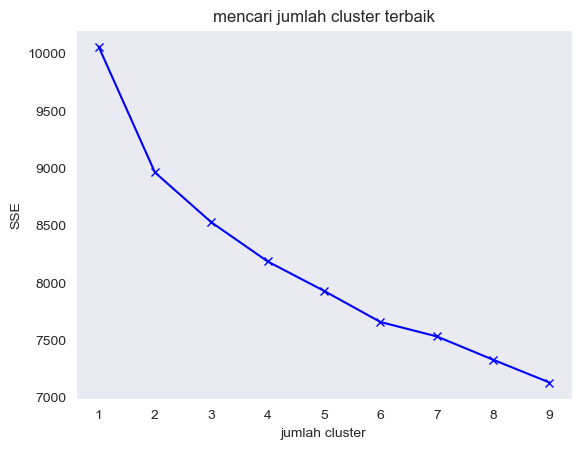

In [198]:
sse = []
range_n_clusters = range(1, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(data_student)
    sse.append(kmeans.inertia_)
    
plt.plot(range_n_clusters, sse, 'bx-')
plt.xlabel("jumlah cluster")
plt.ylabel('SSE')
plt.title("mencari jumlah cluster terbaik")
plt.show()

In [199]:
kmeans = KMeans(n_clusters=2, random_state=0)
cluster = kmeans.fit_predict(data_student)


In [200]:
student_habits['cluster'] = cluster
print(f"{student_habits.shape}\n")
print(student_habits['cluster'].value_counts())

(873, 18)

cluster
1    440
0    433
Name: count, dtype: int64


In [201]:
pd.crosstab(student_habits.score_category, student_habits.cluster)

cluster,0,1
score_category,,
18-27,6,0
28-37,24,0
38-47,64,0
48-57,108,0
58-67,176,4
68-77,55,146
78-87,0,146
88-97,0,84
98-107,0,60


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '18-27'),
  Text(1, 0, '28-37'),
  Text(2, 0, '38-47'),
  Text(3, 0, '48-57'),
  Text(4, 0, '58-67'),
  Text(5, 0, '68-77'),
  Text(6, 0, '78-87'),
  Text(7, 0, '88-97'),
  Text(8, 0, '98-107')])

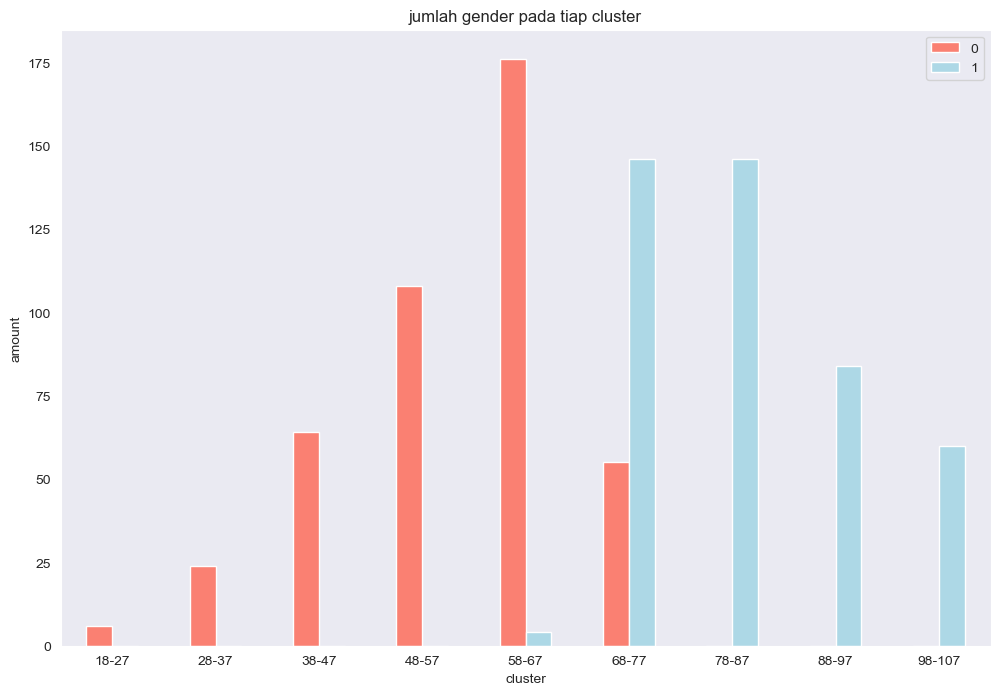

In [202]:
pd.crosstab(student_habits.score_category, student_habits.cluster).plot(kind='bar',
                                                                figsize=(12, 8),
                                                                color=['salmon', 'lightblue'])
plt.title('jumlah gender pada tiap cluster')
plt.xlabel('cluster')
plt.ylabel('amount')
plt.legend(['0', '1'])
plt.xticks(rotation=0)

[None, None, None]

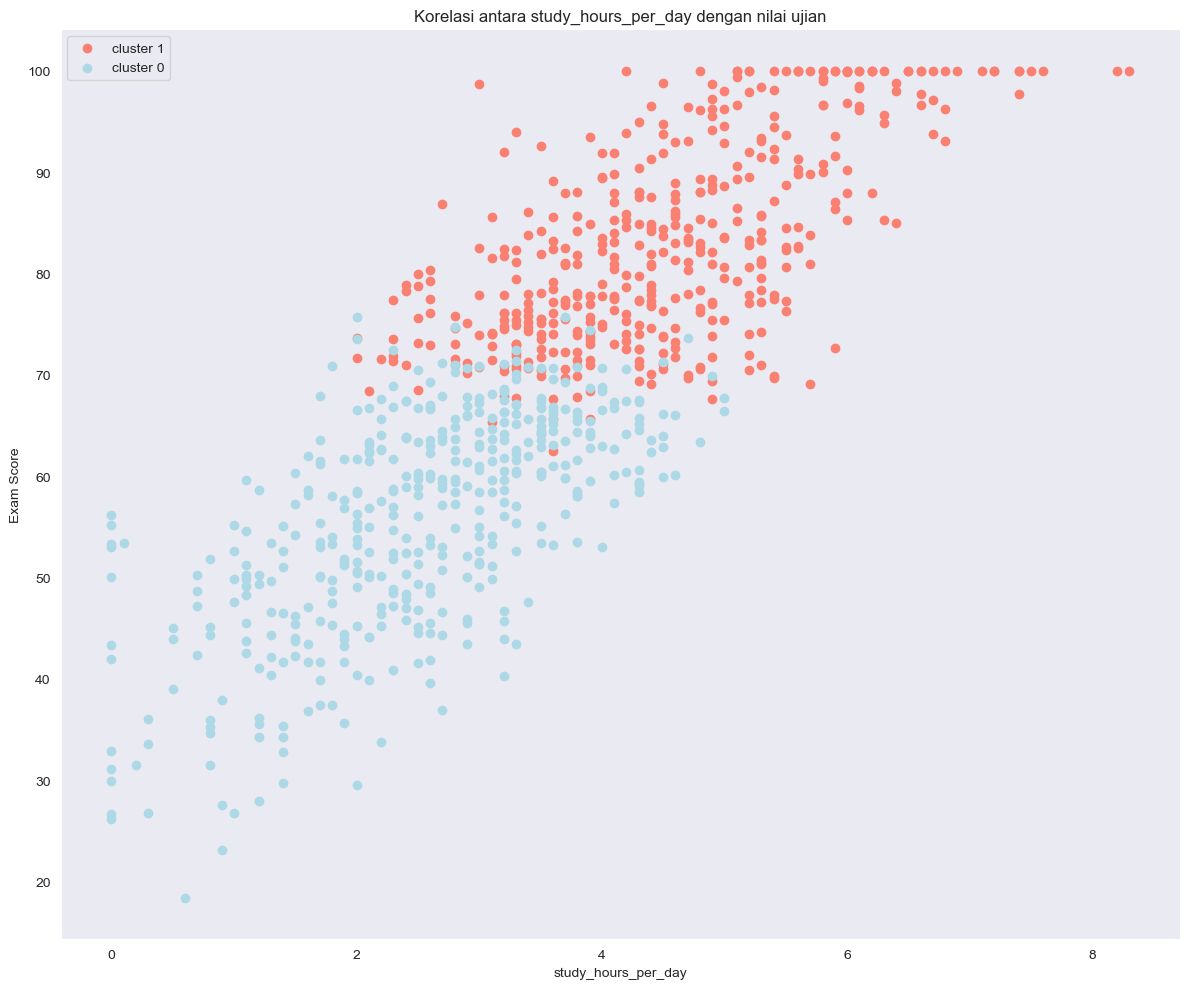

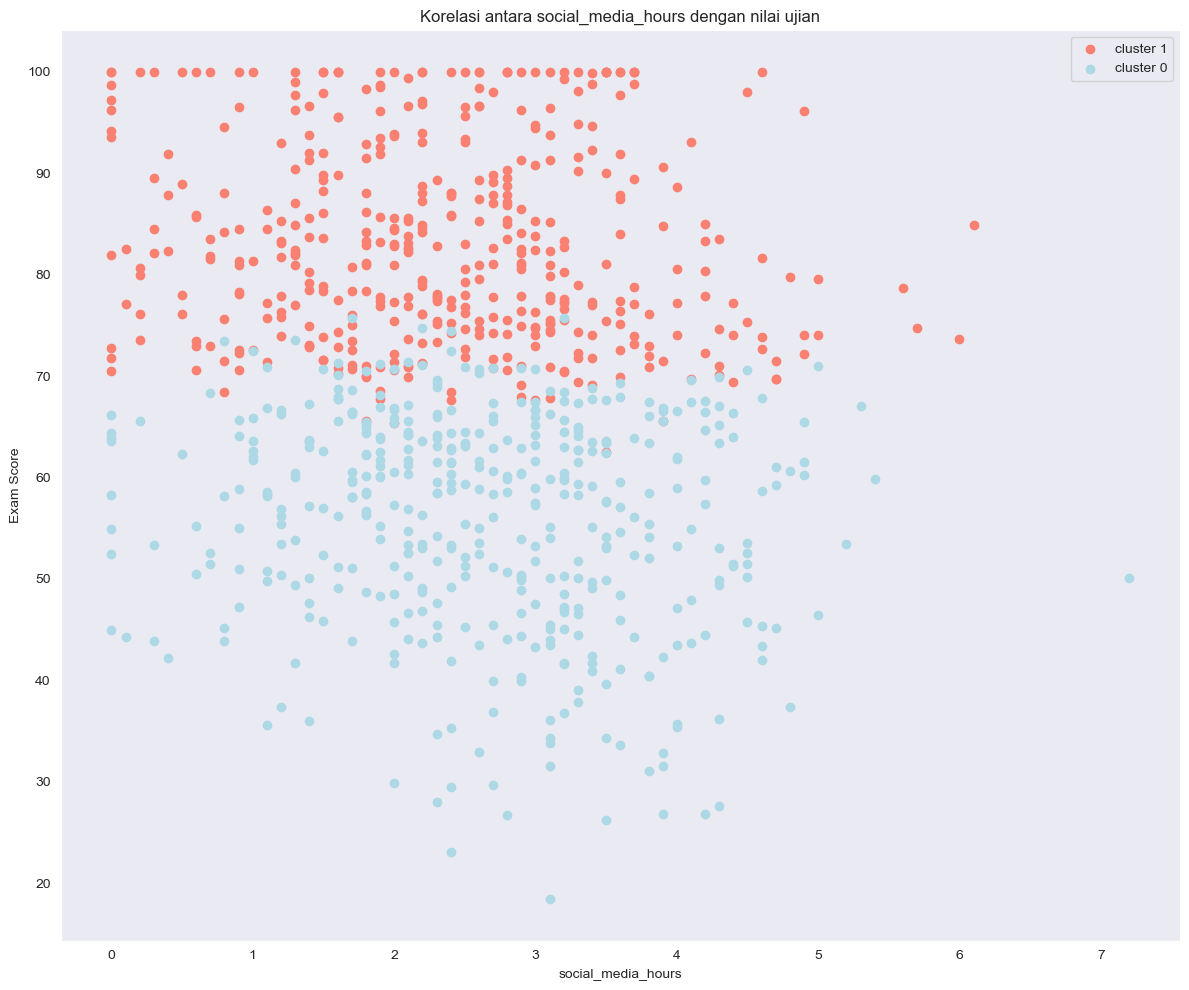

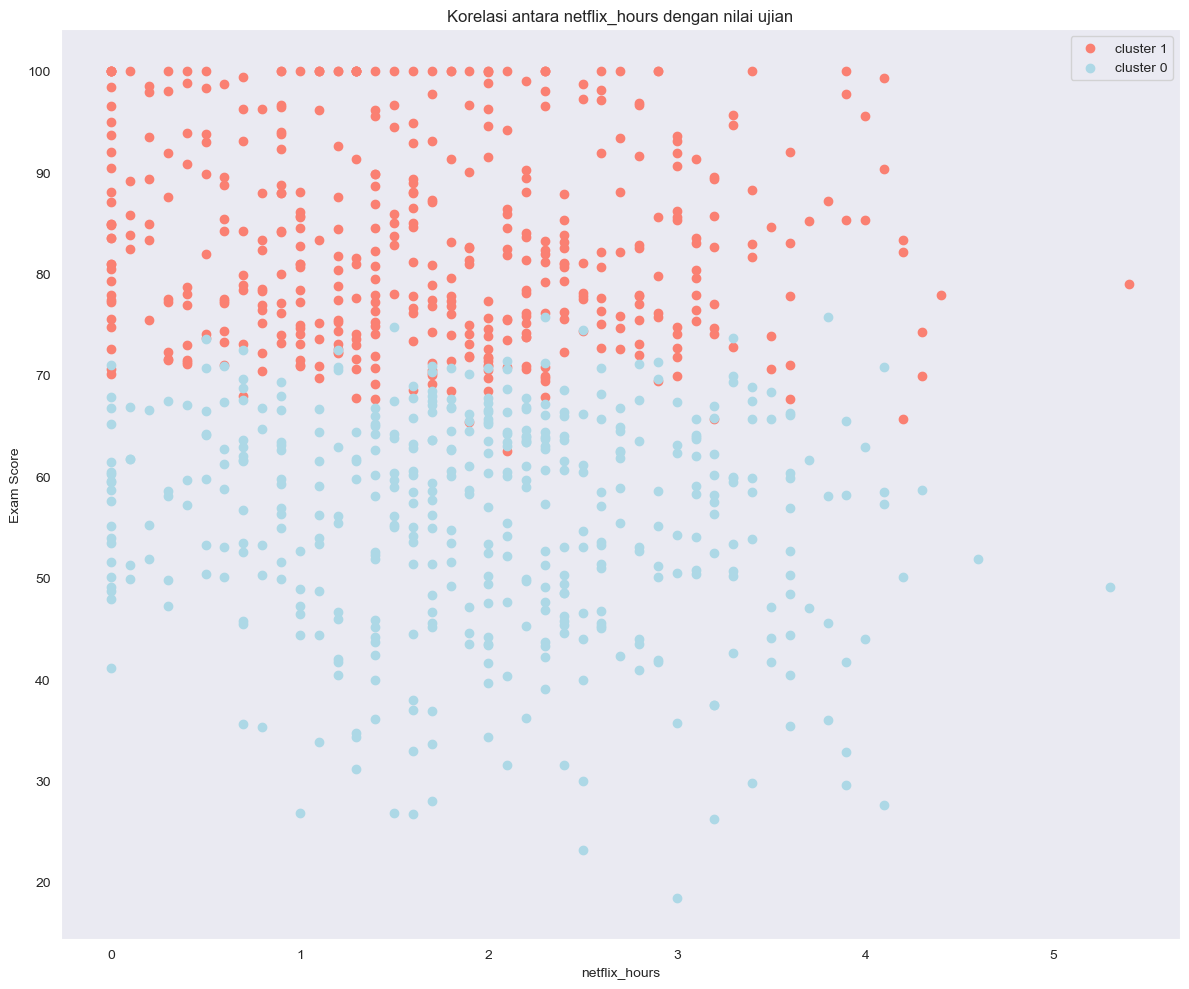

In [203]:
data_compare = ['study_hours_per_day', 'social_media_hours', 'netflix_hours']

def corelation_with_exam_score(column1):
    plt.figure(figsize=(12, 10))
    plt.scatter(student_habits[column1][student_habits.cluster==1],
                student_habits.exam_score[student_habits.cluster==1],
                c='salmon')
    plt.scatter(student_habits[column1][student_habits.cluster==0],
                student_habits.exam_score[student_habits.cluster==0],
                c='lightblue')
    plt.title(f'Korelasi antara {column1} dengan nilai ujian')
    plt.xlabel(column1) 
    plt.ylabel('Exam Score')
    plt.legend(['cluster 1', 'cluster 0'])
    plt.tight_layout() 

[corelation_with_exam_score(i) for i in data_compare]
    

# Karakteristik Siswa:
- Siswa yang cenderung menghabiskan banyak waktu untuk belajar akan mendapatkan nilai yang maksimal.
- Siswa yang sedikit menghabiskan waktu untuk belajar cenderung mendapatkan nilai yang kurang baik.
- selain durasi belajar, kesehatan mental juga dapat mempengaruhi nilai siswa

# Kesimpulan:
- Waktu yang dihabiskan untuk belajar sangat mempengaruhi nilai siswa.
- Kesehatan mental juga dapat mempengaruhi nilai siswa walaupun tidak sebesar durasi belajarnya
- Netflix dan Sosial media tidak begitu mempengaruhi nilai, akan tetapi lebih baik mengurangi penggunaanya agar waktu yang digunakan untuk belajar lebih maksimal.